# BIKE SHARING ASSIGNMENT  - MULTIPLE LINEAR REGRESSION

In [115]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

## Reading and understanding the dataset

In [116]:
# Importing the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [117]:
#Understanding the data
bike.shape

(730, 16)

In [118]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [119]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Exploratory data analysis

#### Dropping irrelavant columns
- Dropping 'instant' column as it represents the index and it is not required for analysis
- Dropping 'dteday' column as the year, month and weekday are already available in other columns
- Dropping 'casual' and 'registered' columns as they are already included in 'cnt' column.
- Dropping 'holiday' column as 'workingday' column already says whether the day is a holiday or not

In [120]:
# Dropping columns
bike.drop(['instant', 'dteday', 'holiday', 'casual', 'registered'], axis = 1, inplace = True)
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data

In [121]:
# After observing the columns and data dictionary, they can be segregated as categorical and numeric as follows.
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

#### Visualizing numeric variables using pair plot

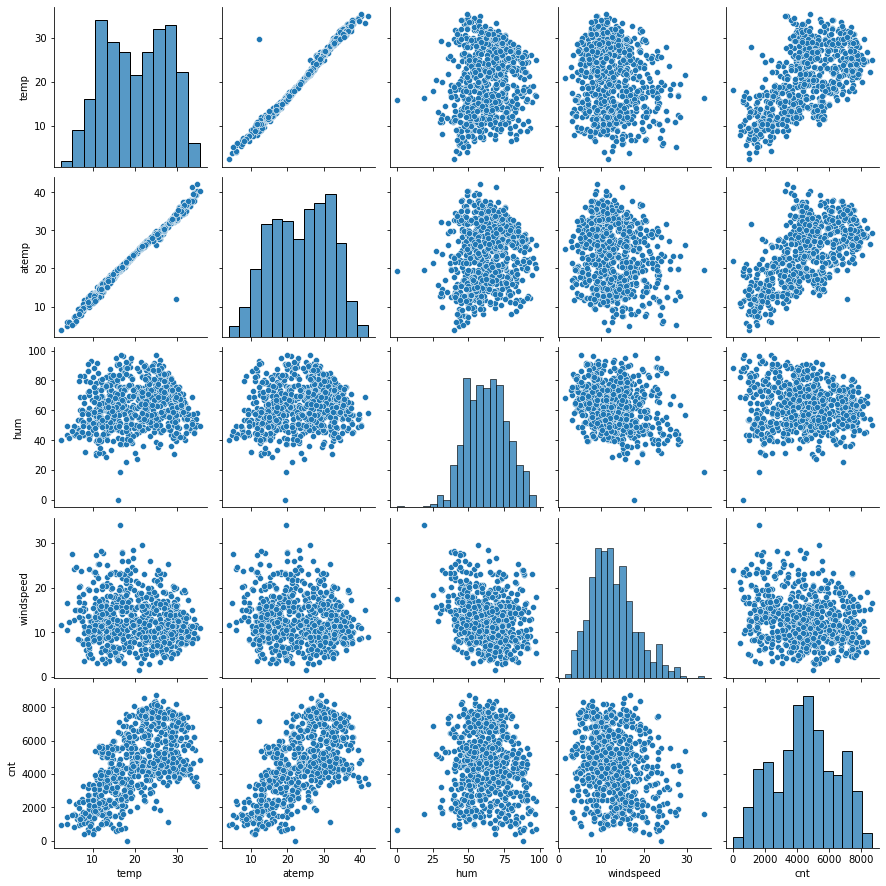

In [122]:
sns.pairplot(bike[numeric_columns])
plt.show()

###### Observations from the above pair plot
- Here 'cnt' is being considered as the target variable.
- The relationship between 'temp', 'atemp' and 'cnt' is nearly linear. They might be good predictors of cnt.
- The relationship between 'hum', 'windspeed' and 'cnt' is very scattered and spread all over the plot. They might not be good predictors of cnt.

#### Visualizing categorical variables using box plot

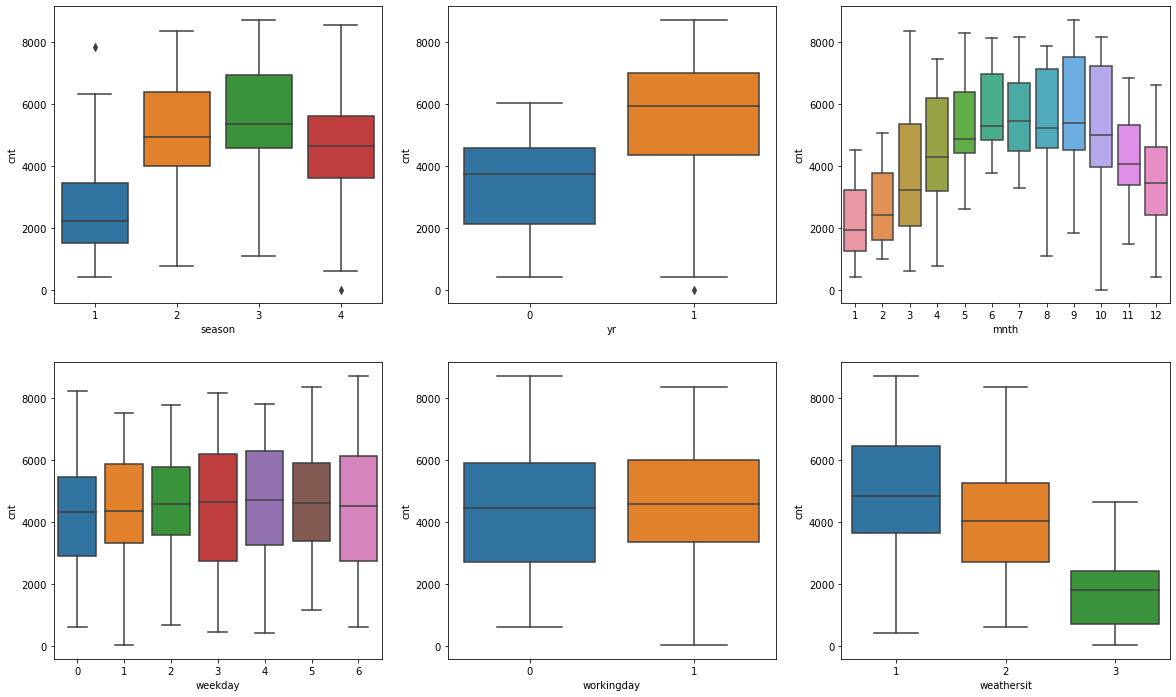

In [123]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data = bike)
plt.show()

###### Observations from the above box plots
- Season: There are more number of customers in summer, fall and winter
- yr: The count of customers have increased from 2018 to 2019
- weathersit: Customer count is high when weather is Clear, Few clouds, Partly cloudy.

## Data Preparation

###### There is a total of 4 categorical variables which have more than 2 values. Dummy variables are being created for them
###### In order to get correlation coefficients and other parameters in linear regression, it is necessary to have either 0 or 1 as values for each categorical column. Otherwise the model may mistake the values for continuous integers and outputs will not be as expected.
- season - 4
- weathersit - 3
- mnth - 12
- weekday - 7

In [124]:
#Replacing values of categorical columns with appropriate names so that dummy variable names can be clearly identified.
bike['season'] = bike['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike['weathersit'] = bike['weathersit'].replace({1:'PartlyCloudy',2:'Cloudy',3:'ScatteredClouds'})

bike['mnth'] = bike['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike['weekday'] = bike['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,mon,1,PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,tue,1,PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,wed,1,PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


###### Creating dummy variables for 'season', 'mnth', 'weekday', 'weathersit' columns and dropping the first column for each set of dummy variables
###### 'drop_first' is necessary to generate n-1 variables for a column which has n categorical values. This will reduce the redundant columns.

In [125]:
bike = pd.get_dummies(data = bike, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True)
bike.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_PartlyCloudy,weathersit_ScatteredClouds
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


## Splitting data into training and testing sets

In [126]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features
###### Each of the numeric columns have a different upper and lower boundary. So they need to be rescaled to have a comparable boundary. If not rescaled, the coefficients might turn out to be irrelevant to each other.
###### Using MinMaxScaler on numerical columns as the upper and lower boundaries are known

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
# Applying fit_transform on numeric columns of training data
bike_train[numeric_columns] = scaler.fit_transform(bike_train[numeric_columns])

In [130]:
bike_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_PartlyCloudy,weathersit_ScatteredClouds
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [131]:
bike_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_PartlyCloudy,weathersit_ScatteredClouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412
std,0.500429,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Now all the columns have a minimum value of 0 and a maximum value of 1

## Generating heatmap to check correlation coefficients and to see which variables are highly correlated

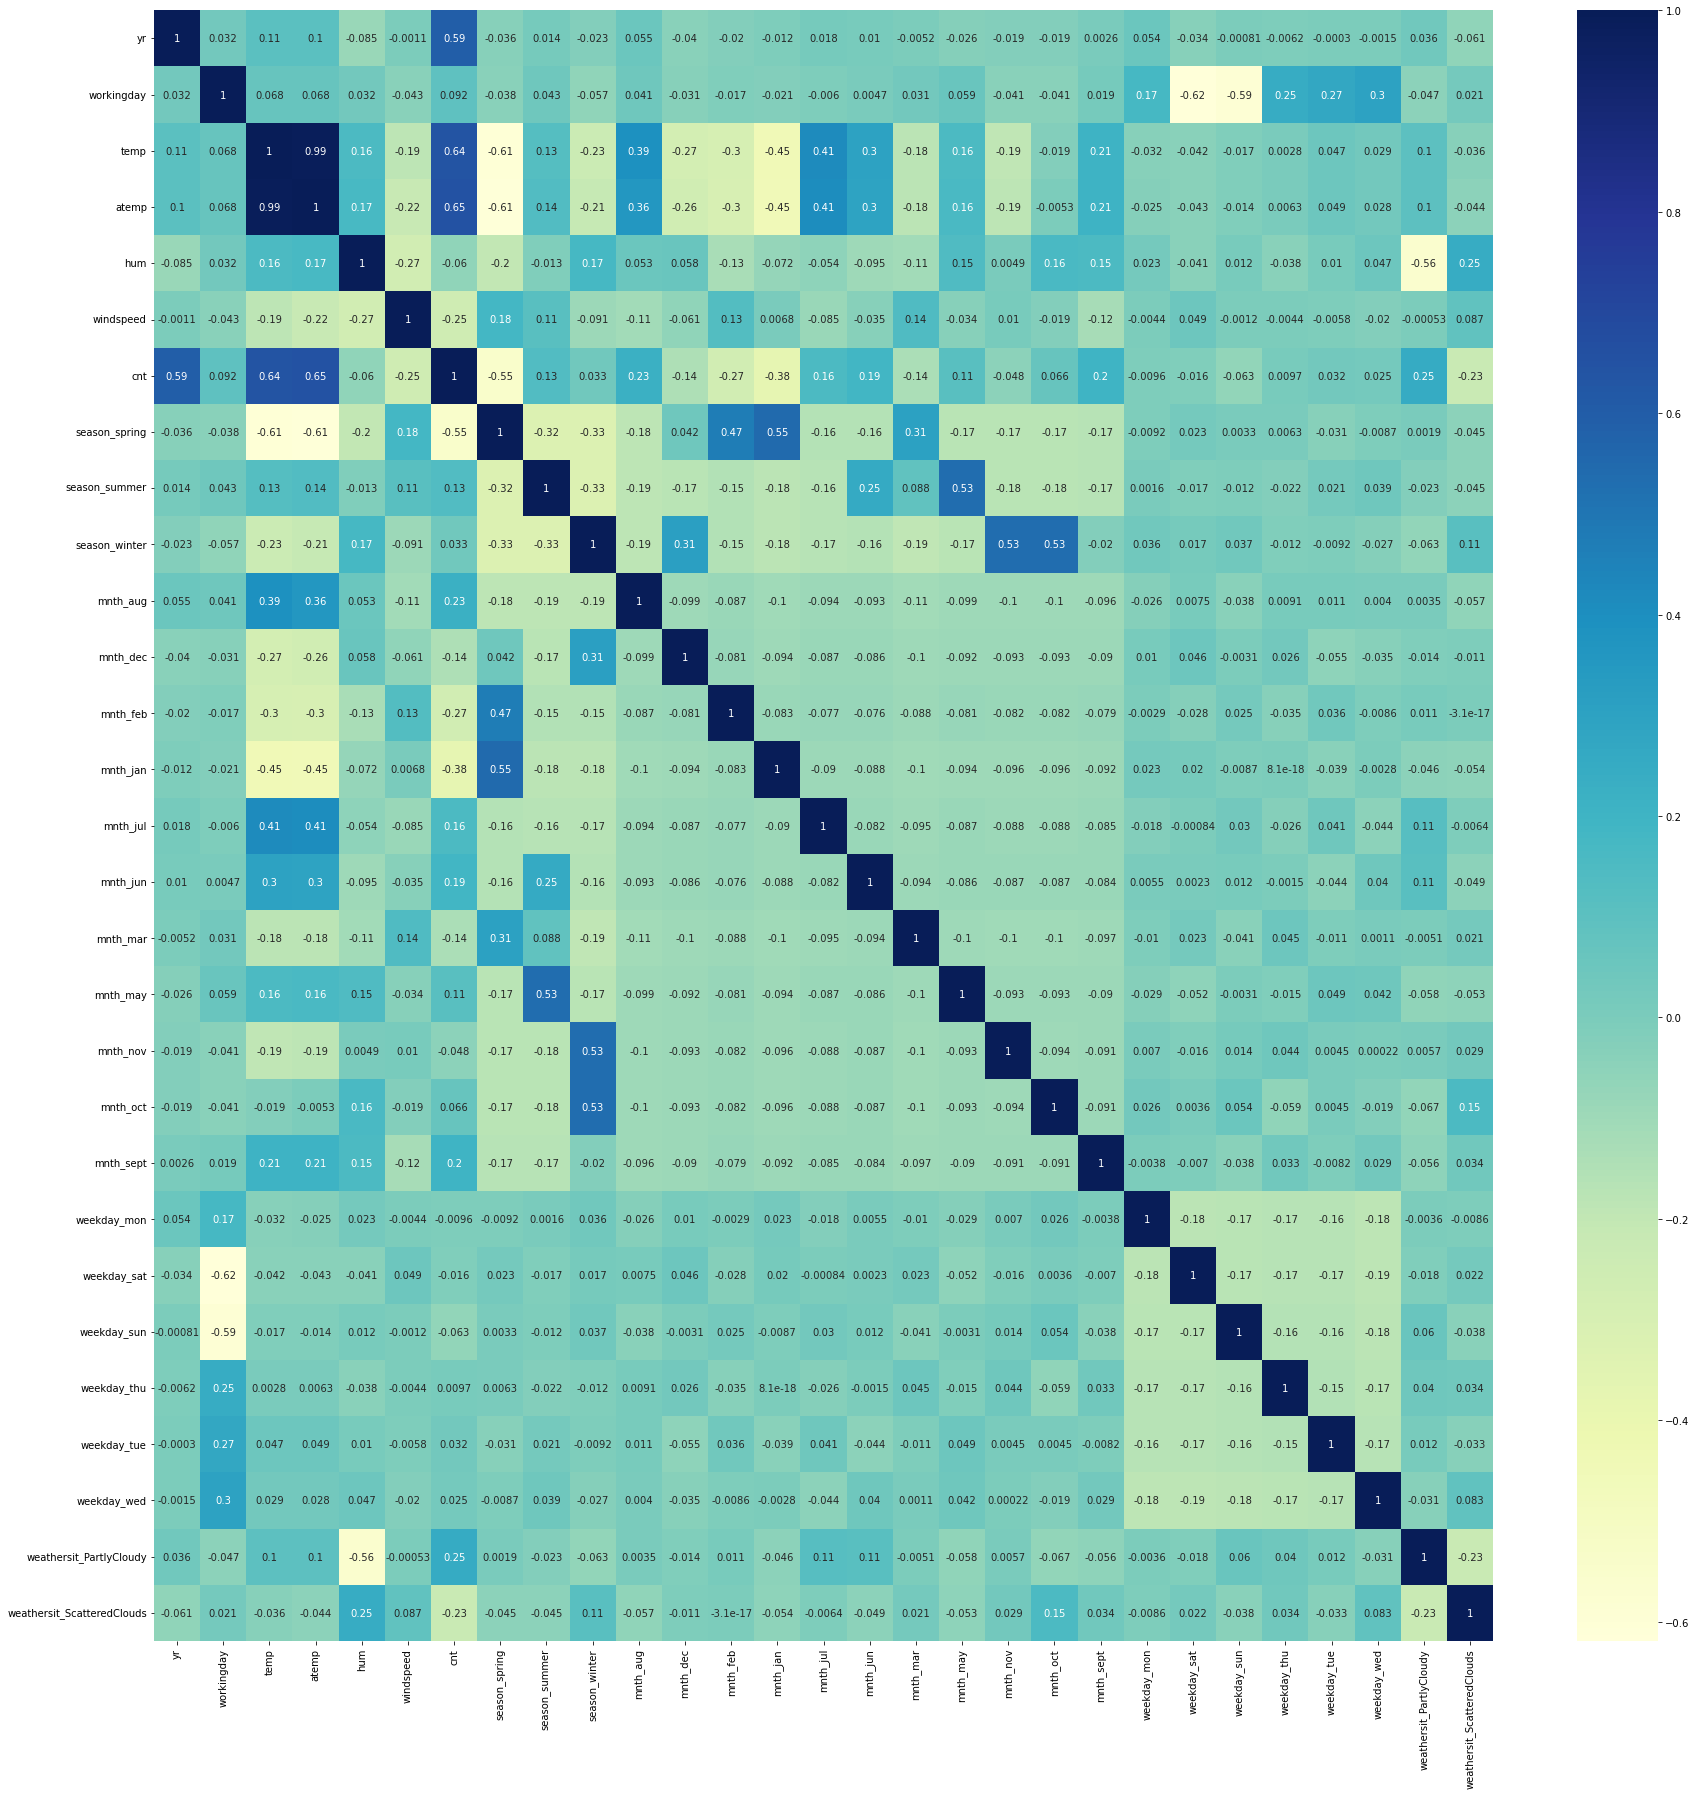

In [132]:
plt.figure(figsize=(30,30))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### A highest correlation coefficient of 0.65 can be seen for the target variable 'cnt' and predictor variable 'atemp'

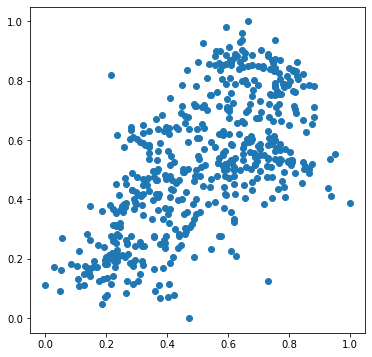

In [133]:
# plotting a scatter plot between above two variables
plt.figure(figsize=[6,6])
plt.scatter(bike_train.atemp, bike_train.cnt)
plt.show()

###### Above scatter plot shows some kind of good relation between cnt and atemp
###### Splitting training data into X_train and y_train for model building

In [134]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Building a model by starting with one variable first and adding up till we achieve a desired R-squared value
###### atemp  and temp columns are almost similar as per the data dictionary and they both have amlost equal correlation coefficients. Therefore either of those variables can be considered for model building. 
###### Here I have considered atemp variable to start with.

In [135]:
# Adding a constant column so that the line doesn't pass through the origin
X_train_lm = sm.add_constant(X_train[['atemp']])

# Creating a first fitted model with 'atemp' using Ordinary Least Squares method(OLS)
lr = sm.OLS(y_train, X_train_lm).fit()

In [136]:
# Checking params
lr.params

const    0.162924
atemp    0.683633
dtype: float64

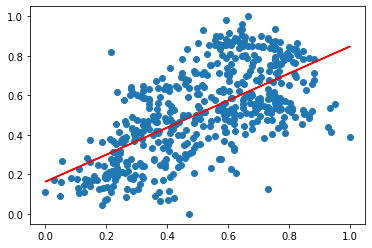

In [137]:
# Visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [138]:
# Printing a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.10e-61
Time:                        15:33:53   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

###### We got an R-squared value of 0.418. Going ahead and adding one more variable to improve the model
###### After looking at the correlation matrix, yr column has a correlation coefficient of 0.59 with cnt. This shows a good relation. Adding this variable to the model

In [139]:
# Adding a constant column so that the line doesn't pass through the origin
X_train_lm = sm.add_constant(X_train[['atemp', 'yr']])

# Creating a second fitted model by adding 'yr'
lr = sm.OLS(y_train, X_train_lm).fit()

In [140]:
# Checking params
lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [141]:
# Printing a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.07e-131
Time:                        15:33:53   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

###### R-Squared value has increased to 0.696 after adding yr. This is a good score for a model.
###### There is one more variable 'weathersit_PartlyCloudy' with a correlation coefficient of 0.25 with cnt. Let's add that variable and see how much R-squared value gets increased

In [142]:
# Adding a constant column so that the line doesn't pass through the origin
X_train_lm = sm.add_constant(X_train[['atemp', 'yr', 'weathersit_PartlyCloudy']])

# Creating a third fitted model by adding 'weathersit_PartlyCloudy'
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking params
lr.params

const                      0.031428
atemp                      0.607245
yr                         0.235752
weathersit_PartlyCloudy    0.081213
dtype: float64

In [143]:
# Printing a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     446.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.89e-142
Time:                        15:33:53   Log-Likelihood:                 368.61
No. Observations:                 510   AIC:                            -729.2
Df Residuals:                     506   BIC:                            -712.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

###### R-Squared value has increased to 0.726 and p-values are below 0.05
###### Going ahead with the second approach

## Building model using Recursive Feature Elimination

In [144]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [145]:
# Fitting training data to LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE. The number of output variables is taken as half of the number of variables if not specfied. Here it is 14.
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [146]:
# Listing out the columns which support RFE and it's ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_PartlyCloudy', True, 1),
 ('weathersit_ScatteredClouds', True, 1)]

In [147]:
# List of columns which support RFE
RFE_columns = X_train.columns[rfe.support_]
RFE_columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_PartlyCloudy',
       'weathersit_ScatteredClouds'],
      dtype='object')

In [148]:
# List of columns which do not support RFE and removed from the training data
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [149]:
# We will be using below function multiple times by removing one variable at a time 
# Creating a function to add constant and fitting a model using Ordinary Least Squares method
def build_model(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    lr = sm.OLS(y_train, X_train_sm).fit()
    
    # Printing summary of the model
    print(lr.summary())
    return lr

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We will be using below function multiple times by removing one variable at a time
# Function to create a dataframe with VIF values
def get_vif(columns):
    X = X_train[columns]
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [151]:
#Building intial model with columns obtained by RFE
build_model(RFE_columns)
get_vif(RFE_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.13e-191
Time:                        15:33:53   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

###### Observations:
- R- Squared: 0.847
- Adjusted R- Squared: 0.843
- All variables have an acceptable p-value (<= 0.05)
- 'hum' variable has a very high VIF of 28.11 while acceptable VIF is below 5. Hence dropping that variable

In [152]:
updated_columns_1 = RFE_columns.drop('hum', 1)

In [153]:
# Rebuilding the model after dropping 'hum' and reading the VIF values
build_model(updated_columns_1)
get_vif(updated_columns_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.73e-189
Time:                        15:33:53   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

###### Observations:
- R- Squared: 0.842
- Adjusted R- Squared: 0.838
- Now 'workingday' variable has a high VIF of 15.86. Hence dropping that variable

In [154]:
updated_columns_2 = updated_columns_1.drop('workingday', 1)

In [155]:
# Rebuilding the model after dropping 'workingday' and reading the VIF values
build_model(updated_columns_2)
get_vif(updated_columns_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.01e-186
Time:                        15:33:53   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

###### Observations:
- R- Squared: 0.837
- Adjusted R- Squared: 0.833
- There is one variable 'weekday_sat' with p-value higher that 0.05. Dropping the variable.

In [156]:
updated_columns_3 = updated_columns_2.drop('weekday_sat', 1)

In [157]:
# Rebuilding the model after dropping 'weekday_sat' and reading the VIF values
build_model(updated_columns_3)
get_vif(updated_columns_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.65e-187
Time:                        15:33:53   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

###### Observations:
- R- Squared: 0.836
- Adjusted R- Squared: 0.832
- There is one more variable 'temp' with VIF value slightly higher that 5. Dropping it might result in overfitting the model.
###### The results looks pretty enough with decent R-squared and adjusted R-squared values. Hence stopping the model building here and finalizing it

In [158]:
# Fitting training data with selected columns
lr = LinearRegression()
lr.fit(X_train[updated_columns_3],y_train)

LinearRegression()

## Residual analysis and making sure assumptions are correct

In [159]:
# Getting predicted values for training data
y_train_cnt = lr.predict(X_train[updated_columns_3])

Text(0.5, 0, 'Errors')

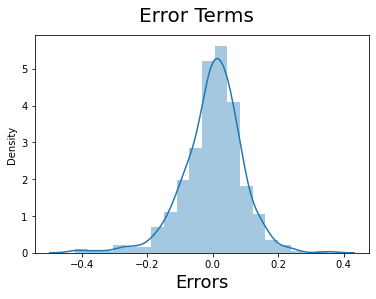

In [160]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)       
plt.xlabel('Errors', fontsize = 18)

###### Observations:
- Error terms follow a normal distribution with mean equal to 0

###### Analysing Root mean squared error (RMSE) for training data

In [161]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_cnt)
print(rmse)

0.008255062878703468


###### RMSE is close to 0 which is an indication that the residual error is minimal

 ## Making predictions using test data

In [162]:
# Applying MinMaxScaler to rescale the variables
bike_test[numeric_columns] = scaler.transform(bike_test[numeric_columns])

In [163]:
bike_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_PartlyCloudy,weathersit_ScatteredClouds
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397
std,0.500722,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
# Dividing into X_test and y_test for model building
y_test = bike_test.pop('cnt')
X_test = bike_test

In [165]:
X_test_lm = X_test[updated_columns_3]

In [166]:
# Fitting testing data with selected columns
lr = LinearRegression()
lr.fit(X_test_lm, y_test)

LinearRegression()

In [167]:
# Generating predicted results with test data using the model
y_test_pred = lr.predict(X_test_lm)

Text(0, 0.5, 'y_test_pred')

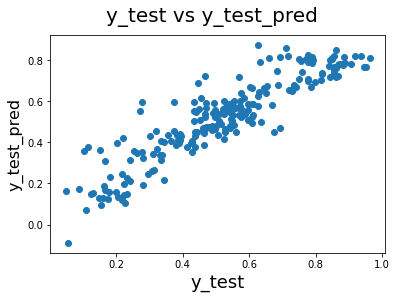

In [168]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

###### Observation: The scatter plot shows a close-to-linear relation between actual and predicted values

In [169]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8194227061897723

###### Analysing Root mean squared error (RMSE) for testing data

In [170]:
rmse = mean_squared_error(y_test, y_test_pred)
print(rmse)

0.008576664503107925


###### RMSE is close to 0 which is an indication that the residual error is minimal

# SUMMARY
###### RESULTS:
<table>
    <tr>
        <th> </th>
        <th>Training data</th>
        <th>Testing data</th>
    </tr>
    <tr>
        <th>R-Squared</th>
        <th>0.836</th>
        <th>0.820</th>
    </tr>    
    <tr>
        <th>Adjusted R-Squared</th>
        <th>0.833</th>
        <th>NA</th>
    </tr>
    <tr>
        <th>RMSE</th>
        <th>0.0083</th>
        <th>0.0086</th>
    </tr>    
</table>

- Both datasets have an R-Squared value higher than 80% which means around 80% of variance in the data is being explained by the model
- Both datasets have an RMSE value close to 0. This means there is very low deviation of predicted values from actual values
- The p-values of the variables are less than 0.05 which says they are very significant

###### CONCLUSION
The variables which are significant to predict the demand for bikes are:
- year
- temperature
- windspeed
- seasons: spring, summer, winter
- months: july, september
- day of the week: sunday
- weather: partly cloudy, scattered clouds